In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

In [18]:
df=pd.read_csv('/home/AIML_Student/Documents/210962002/lr_SGD.csv')
df

,X1,X2,Y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242070,1
9,7.673756,3.508563,1


In [24]:

x1 = df.iloc[:,:-2]
x2 = df.iloc[:,-2:-1]
y = df.iloc[:,-1]
npx1 = np.array(x1)
npx2 = np.array(x2)
npy = np.array(y)

b0,b1,b2 = 0,0,0
learning_rate = 0.01 

def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

epochs = 50
accuracy,b0s,b1s,b2s,errors = [],[],[],[],[]
for epoch in range(0,epochs):
    correct = 0
    for i in range(len(x1)):
        output = b0 + b1*npx1[i] + b2*npx2[i]
        pred = sigmoid(output)
        diff = npy[i] - pred
        b0 = b0 + learning_rate * (diff) * pred * (1-pred)
        b1 = b1 + learning_rate * (diff) * pred * (1-pred) * npx1[i]
        b2 = b2 + learning_rate * (diff) * pred * (1-pred) * npx2[i]
        b0,b1,b2 = b0[0],b1[0],b2[0]
        if (pred<0.5 and npy[i] == 0) or (pred>=0.5 and npy[i] == 1):
            correct += 1
    accuracy.append(correct/len(npx1)) 
    b0s.append(b0)
    b1s.append(b1)
    b2s.append(b2)
    errors.append(diff)
    if (epoch+1)%5 == 0:
        print("After epoch",epoch+1,": b0 =",b0,"b1 =",b1,"b2 =",b2," Error = ",diff[0])



After epoch 5 : b0 = -0.006231094865398651 b1 = 0.10676709833993013 b2 = -0.03845298446175096  Error =  0.34960710432735354
After epoch 10 : b0 = -0.020724475791660216 b1 = 0.1546201361132624 b2 = -0.09222316648286195  Error =  0.3113024777143045
After epoch 15 : b0 = -0.036660734755040364 b1 = 0.18610719084906713 b2 = -0.1465912233586454  Error =  0.3034663483685278
After epoch 20 : b0 = -0.05225219023657796 b1 = 0.21244297858108752 b2 = -0.19780024883604075  Error =  0.3019476060987166
After epoch 25 : b0 = -0.06705436558514496 b1 = 0.23667506623723406 b2 = -0.24511855372236993  Error =  0.3008104610438481
After epoch 30 : b0 = -0.08101062703855536 b1 = 0.2596331013746516 b2 = -0.2887187277218803  Error =  0.29876783483044655
After epoch 35 : b0 = -0.09417373562446871 b1 = 0.2815338176419728 b2 = -0.3290052995281894  Error =  0.295789283093181
After epoch 40 : b0 = -0.10661929132581059 b1 = 0.30244035923366713 b2 = -0.3663956247177904  Error =  0.29212197312116694
After epoch 45 : b0

Equation: y = -0.12964053990985444 + 0.34141935087394765 *x1 -0.433903683493783 *x2
Predicted values:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


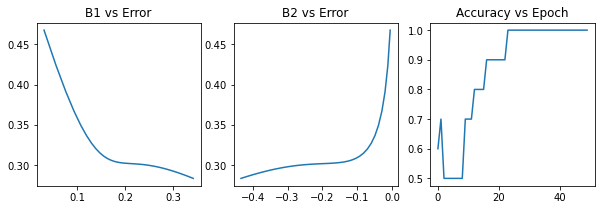

In [23]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
plt.plot(b1s,errors),plt.title("B1 vs Error")
plt.subplot(1,3,2)
plt.plot(b2s,errors),plt.title("B2 vs Error")

plt.subplot(1,3,3)
plt.plot(np.arange(50),accuracy)
plt.title("Accuracy vs Epoch")
print("Equation: y =",b0,"+",b1,"*x1",b2,"*x2")
npy = b0 + b1*npx1 + b2*npx2
output = sigmoid(npy)
func = lambda x: 0 if x<0.5 else 1
prediction = list(map(func,output))
print("Predicted values: ",prediction)

In [26]:
#Using scikit-learn model
from sklearn.linear_model import LogisticRegression
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.coef_,clf.intercept_)

[[ 1.18383416 -0.35803503]] [-4.55163352]


After epoch 5 : b0 = -0.17873995656892583 b1 = 0.25761475418286234  Error =  0.1581535228967712
After epoch 10 : b0 = -0.3887231085829156 b1 = 0.2882287689335063  Error =  0.15410350275746554
After epoch 15 : b0 = -0.586371200141669 b1 = 0.31757036267817335  Error =  0.1497750700568412
After epoch 20 : b0 = -0.7712551390839545 b1 = 0.34551132417366837  Error =  0.14528472330820497
After epoch 25 : b0 = -0.9435886116133605 b1 = 0.3719981416877726  Error =  0.14074718888796578
After epoch 30 : b0 = -1.1039879542051059 b1 = 0.39705228055245545  Error =  0.13623942724208982
After epoch 35 : b0 = -1.2532873277629089 b1 = 0.42073975484767606  Error =  0.13181187384180537
After epoch 40 : b0 = -1.3924091792092128 b1 = 0.44314916333958426  Error =  0.1274970915478949
After epoch 45 : b0 = -1.5222817623977043 b1 = 0.4643775120949584  Error =  0.12331559613007259
After epoch 50 : b0 = -1.6437913918166027 b1 = 0.48452181890269636  Error =  0.11927962789465463
Equation: y = -1.6437913918166027 + 0

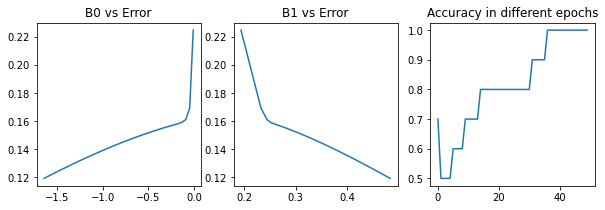

In [27]:
#2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# tab = pd.read_csv("lrsgd.csv")
x = df.iloc[:,:-2]
y = df.iloc[:,-1]
npx = np.array(x)
npy = np.array(y)

b0,b1 = 0,0
learning_rate = 0.1 

def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

epochs = 50
accuracy,b0s,b1s,errors = [],[],[],[]
for epoch in range(0,epochs):
    correct = 0
    for i in range(len(x1)):
        output = b0 + b1*npx[i] 
        pred = sigmoid(output)
        diff = npy[i] - pred
        b0 = b0 + learning_rate * (diff) * pred * (1-pred)
        b1 = b1 + learning_rate * (diff) * pred * (1-pred) * npx[i]
        b0,b1 = b0[0],b1[0]
        if (pred<0.5 and npy[i] == 0) or (pred>=0.5 and npy[i] == 1):
            correct += 1
    accuracy.append(correct/len(npx1)) 
    b0s.append(b0)
    b1s.append(b1)
    errors.append(diff)
    if (epoch+1)%5 == 0:
        print("After epoch",epoch+1,": b0 =",b0,"b1 =",b1," Error = ",diff[0])

plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
plt.plot(b0s,errors),plt.title("B0 vs Error")
plt.subplot(1,3,2)
plt.plot(b1s,errors),plt.title("B1 vs Error")

plt.subplot(1,3,3)
plt.plot(np.arange(50),accuracy)
plt.title("Accuracy in different epochs")
print("Equation: y =",b0,"+",b1,"*x")

npy = b0 + b1*npx 
output = sigmoid(npy)
func = lambda x: 0 if x<0.5 else 1
prediction = list(map(func,output))
print(prediction)

/tmp/ipykernel_4181/3636613384.py:3: RuntimeWarning: divide by zero encountered in log
  y = -np.log(x)
/tmp/ipykernel_4181/3636613384.py:4: RuntimeWarning: divide by zero encountered in log
  z = -np.log(1-x)


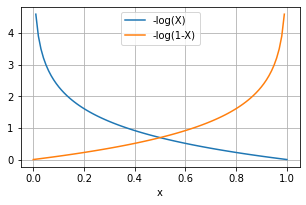

(Text(0.5, 17.200000000000003, 'x'),
 None,
 None)

In [28]:
#
x = np.linspace(0,1,100)
y = -np.log(x)
z = -np.log(1-x)
plt.figure(figsize = (5,10)),plt.subplot(3,1,3)
#Plotting the values on graph:
plt.plot(x,y,label="-log(X)")
plt.plot(x,z,label="-log(1-X)")
plt.xlabel("x"),plt.legend(),plt.grid(),plt.show()

In [29]:
#Using scikit-learn model
from sklearn.linear_model import LogisticRegression
X = df.iloc[:,:-2]
y = df.iloc[:,-1]
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.coef_,clf.intercept_)

[[1.22553095]] [-5.72049426]


After epoch 50 : b0 = -0.06779638193433425 b1 = 0.23187789021939417 b2 = -0.247055107795964  Error =  0.3054719084174652
After epoch 100 : b0 = -0.13007145259797082 b1 = 0.33723823045623713 b2 = -0.43483548763494406  Error =  0.28679761671246096
After epoch 150 : b0 = -0.17894877820164246 b1 = 0.4207982565786149 b2 = -0.5718779979436501  Error =  0.26402259731027355
After epoch 200 : b0 = -0.21915934827912514 b1 = 0.48852192461750504 b2 = -0.6794773444045387  Error =  0.2442771774512441
After epoch 250 : b0 = -0.25325644126653457 b1 = 0.5450367182871507 b2 = -0.7678416313304619  Error =  0.22780701128351277
Equation: y = -0.25325644126653457 + 0.5450367182871507 *x1 -0.7678416313304619 *x2
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


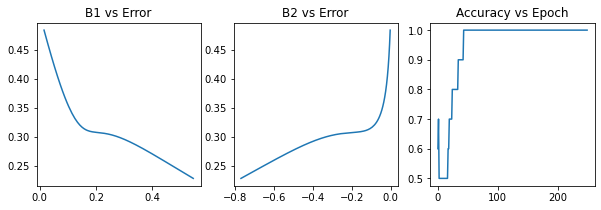

In [30]:
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# tab = pd.read_csv("lrsgd.csv")
x1 = df.iloc[:,:-2]
x2 = df.iloc[:,-2:-1]
y = df.iloc[:,-1]
npx1 = np.array(x1)
npx2 = np.array(x2)
npy = np.array(y)

b0,b1,b2 = 0,0,0
learning_rate = 0.005

def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

epochs = 250
accuracy,b0s,b1s,b2s,errors = [],[],[],[],[]
for epoch in range(0,epochs):
    correct = 0
    for i in range(len(x1)):
        output = b0 + b1*npx1[i] + b2*npx2[i]
        pred = sigmoid(output)
        diff = npy[i] - pred
        b0 = b0 + learning_rate * (diff) * pred * (1-pred)
        b1 = b1 + learning_rate * (diff) * pred * (1-pred) * npx1[i]
        b2 = b2 + learning_rate * (diff) * pred * (1-pred) * npx2[i]
        b0,b1,b2 = b0[0],b1[0],b2[0]
        if (pred<0.5 and npy[i] == 0) or (pred>=0.5 and npy[i] == 1):
            correct += 1
    accuracy.append(correct/len(npx1)) 
    b0s.append(b0)
    b1s.append(b1)
    b2s.append(b2)
    errors.append(diff)
    if (epoch+1)%50 == 0:
        print("After epoch",epoch+1,": b0 =",b0,"b1 =",b1,"b2 =",b2," Error = ",diff[0])

plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
plt.plot(b1s,errors),plt.title("B1 vs Error")
plt.subplot(1,3,2)
plt.plot(b2s,errors),plt.title("B2 vs Error")

plt.subplot(1,3,3)
plt.plot(np.arange(250),accuracy)
plt.title("Accuracy vs Epoch")
print("Equation: y =",b0,"+",b1,"*x1",b2,"*x2")
npy = b0 + b1*npx1 + b2*npx2
output = sigmoid(npy)
func = lambda x: 0 if x<0.5 else 1
prediction = list(map(func,output))
print(prediction)